In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
energy_type = "Wind Capacity"

In [27]:
df = pd.read_excel("bp-stats-review-2019-all-data.xlsx", energy_type, header=3)

In [28]:
df = df.loc[~df["Megawatts"].isnull()]

In [29]:
df = df.loc[df["Megawatts"].str.contains("Total")]

In [30]:
df = df.set_index("Megawatts")

In [31]:
df2 = df.stack().rename("energy").reset_index()

In [32]:
df2.head()

,Megawatts,level_1,energy
0,Total North America,1997,1639
1,Total North America,1998,2226
2,Total North America,1999,2573
3,Total North America,2000,2533
4,Total North America,2001,4095


In [33]:
df2 = df2[pd.to_numeric(df2['level_1'], errors='coerce').notnull()]
df2.rename(columns={"Megawatts": "Region"}, inplace=True)

In [34]:
df2.loc[:, "level_1"] = pd.to_numeric(df2["level_1"])
df2.loc[:, "energy"] = pd.to_numeric(df2["energy"])
df2 = df2.loc[df2["level_1"] >= 1990]
df2 = df2.loc[df2["level_1"] <= 2018]

In [35]:
plt.style.use('ggplot')

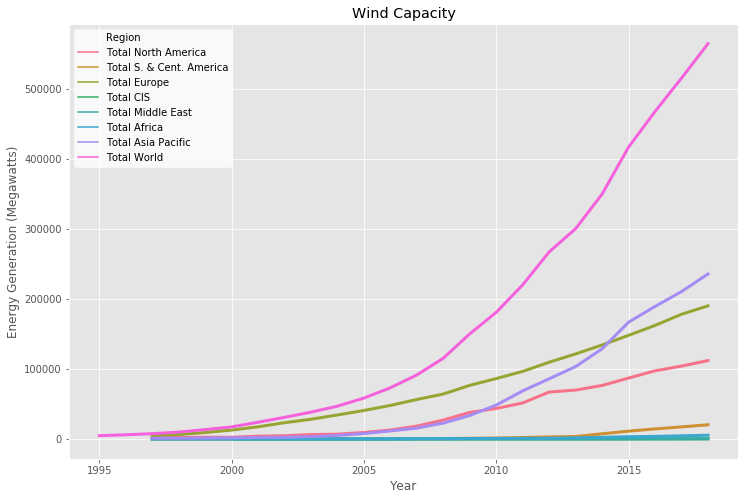

In [36]:
plt.figure(figsize=(12,8))
sns.lineplot(x="level_1", y="energy", hue="Region", data=df2, linewidth=3)
plt.title(energy_type)
plt.xlabel("Year")
plt.ylabel("Energy Generation (Megawatts)")
frame = plt.legend().get_frame()
frame.set_color('white')
plt.savefig(energy_type + ".png")